#Introduction to Artificial Intelligence and Computer Vision

##What is Computer Vision?

Computer vision is part of artificial intelligence (AI), as it seeks to model human vision, with the intention of replicating its functions, through technology. It allows computers and systems to extract meaningful information from digital images, videos and other visual inputs and act or make recommendations based on that information. If AI allows computers to think, machine vision allows them to see, observe and understand. Machine vision works much like human vision, except that humans have a lifetime of context to train them to distinguish objects, how far away they are, whether they are moving and if there is something wrong with an image. Computer vision trains machines to perform these functions, but it needs to do so in much less time, using cameras, data and algorithms instead of retinas, optic nerves and visual cortex. However, because a system trained to inspect products or visualize a production asset can analyze thousands of products or processes per minute, detecting defects or problems that are imperceptible, it can quickly surpass human capabilities. That is a tremendous advantage!

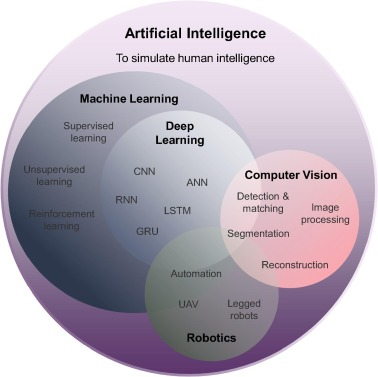

#Traditional Computer Vision vs. Deep Learning Computer Vision

here are two main approaches in computer vision: traditional computer vision and deep learning-based computer vision.


Traditional computer vision is a more classical approach that involves extracting specific features from images and using traditional machine learning algorithms to perform visual recognition tasks. In this approach, algorithms are hand-designed to perform specific tasks, such as edge detection, object segmentation, or facial recognition. These algorithms often rely on hand-designed features, such as image descriptors, to identify objects and patterns in images.

On the other hand, deep learning-based computer vision relies on deep neural networks to automatically learn image features and patterns without the need to manually design image descriptors. Deep neural networks are capable of learning hierarchical representations of images through multiple layers of processing. These networks are trained on large labeled datasets, where they are presented with example images and their respective classes or labels. During training, the network adjusts its weights and internal parameters to optimize its ability to correctly classify images. After training, the neural network can be used to perform tasks such as object detection, facial recognition, image segmentation, and many others.

Deep learning-based computer vision has been gaining momentum in recent years, outperforming many traditional approaches in several computer vision tasks. This is due to the ability of deep neural networks to automatically learn complex features and patterns, allowing the development of more robust and accurate models. Furthermore, the use of deep learning techniques, such as convolutional networks (CNNs) and generative adversarial networks (GANs), has enabled significant advances in areas such as object recognition, semantic segmentation, image super-resolution, and more.

However, it is important to note that both traditional computer vision and deep learning-based computer vision have their own strengths and weaknesses, and the choice of approach depends on the specific task and available resources. While traditional computer vision may be better suited for simpler problems or when there are limitations on computational resources, deep learning-based computer vision generally offers better performance and flexibility on complex tasks and the availability of large labeled datasets.

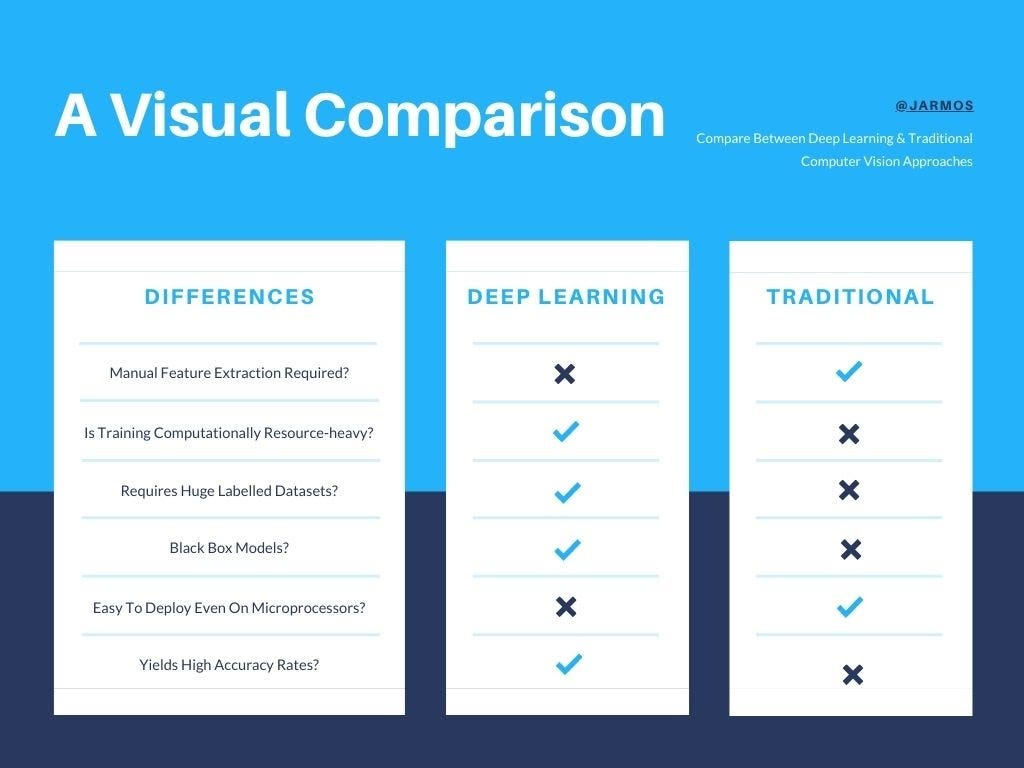

## Introduction to artificial neural networks

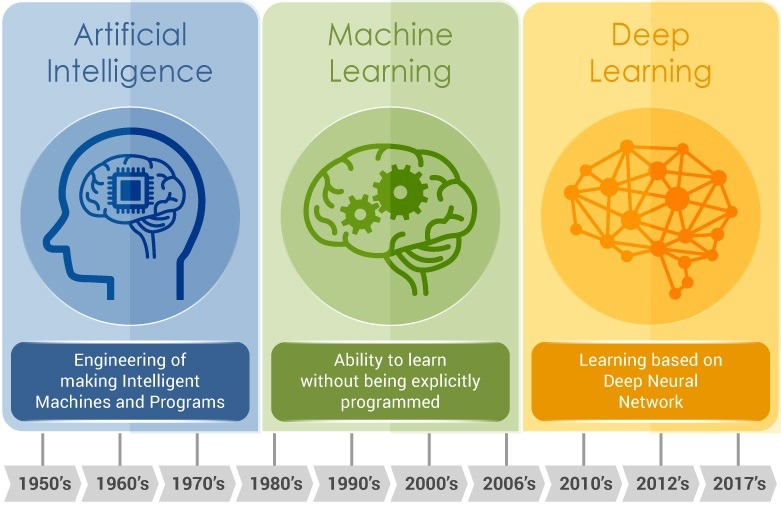

Artificial Neural Network (ANN) can be defined as a complex structure interconnected by simple processing elements (neurons), which have the ability to perform operations such as calculations in parallel, for data processing and knowledge representation. Its first concept was introduced in 1943, but it gained popularity a few decades later with the introduction of training algorithms such as backpropagation, which allows subsequent training to be carried out to improve the model's results.
Since its development, this technique has been widely used and validated by several research areas that aim to predict events and assist in decision-making.

### Perceptron

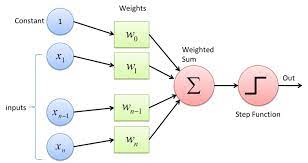

In 1958, the Perceptron Artificial Neural Network was introduced by Frank Rosenblatt, inspired by the work of Walter Pitts and Warren Sturgis McCulloch. This model is one of the oldest and deals with a single neuron, classifying the result in a linear way. In the figure below, the artificial neuron is a Perceptron that receives several input values ​​y(n). These inputs are multiplied by the weight of the synapse w and, in the end, they are added together to form an input set ξ = ∑ w * y(n). This result goes through a linear activation function and transmits the output v. When the value ξ exceeds the limit of the activation function, the neuron will be activated and return a value.

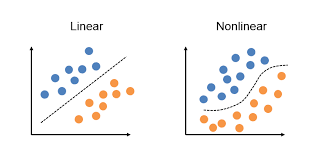

### Multilayer Perceptron

In order to deal with non-linearly separable problems, hidden neuron layers were added to the Rosenblatt model, thus forming the Multilayer Perceptron (MLP) Artificial Neural Network.

This new topology works as a feedforward network (progressive network, the output of a neuron connects with another neuron in the next layer, in the left/right direction), formed by a set of neurons called “nodes”, as shown in the image to the side. The network has an input layer (without computational function), one or more hidden layers and an output layer. The complexity of the MLP network is determined by the number of hidden layers and the number of neurons that these layers have.

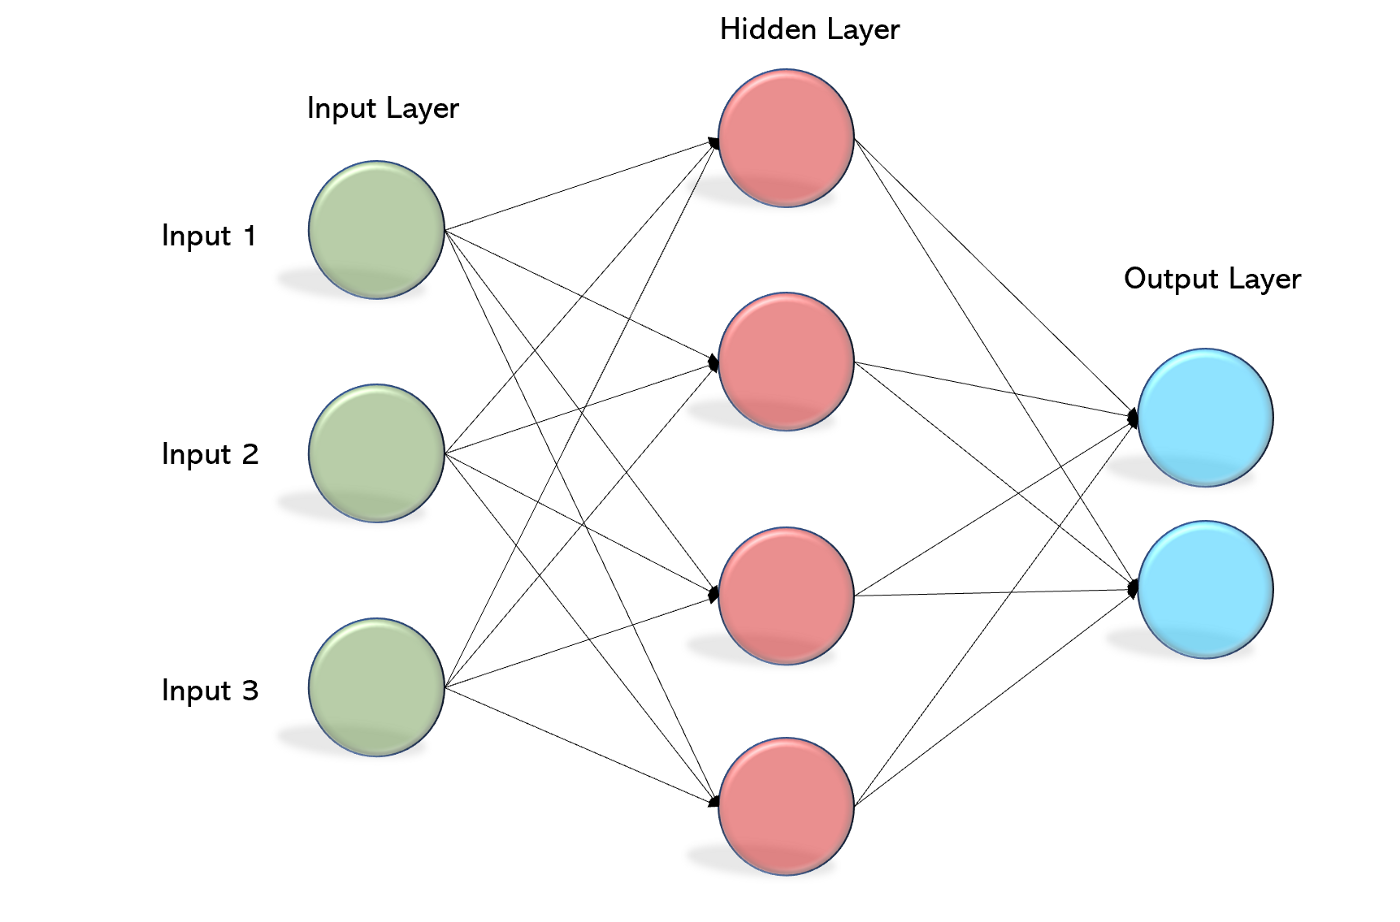

## Deep Learning

In classic Machine Learning, a problem that always arises is that the most difficult task is not training the machine, but rather engineering variables that aid in learning. In image recognition, an example of how this happens can be seen in the numerous and far from simple pre-processing processes that the image undergoes before being fed to a Machine Learning algorithm: noise filters, segmentation, contrast enhancement, contour detection, etc. Artificial neural networks (ANNs) emerge as a way to solve this problem: instead of needing someone to create representative variables manually, neural networks are able to learn them on their own. In contrast to classic Machine Learning (image on the side, left column), neural networks are commonly used in a new type of Machine Learning, called representation learning or Deep Learning (image on the side, right column), in which, in addition to learning a mapping between representative features and a desired output, the machine can learn the representative features themselves automatically.

Deep learning techniques are primarily based on the use of deep neural networks. We can think of the various hidden layers of a deep neural network as learning hierarchical levels of abstraction. In image recognition, for example, we can think of the lower layers (close to the inputs) as learning to detect features and brightness variations, while the higher layers learn to assemble these features into object parts. These parts can then be used by a linear model to discriminate between one object and another.

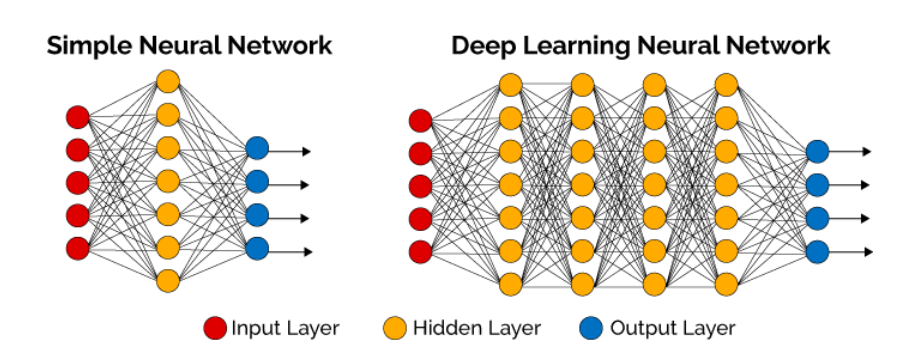

## Vegetation and Weed Mapping using Artificial Neural Networks

Link to access the Dataset: https://drive.google.com/drive/folders/19HnvwosLbAoLhT5DvJyeatb1dB4JwtV6?usp=sharing

First let's install rasterio and connect the Drive:

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 65.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now, let's import the libraries:

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.windows import Window
import pandas as pd
import geopandas as gpd
from pylab import rcParams
import matplotlib
rcParams['figure.figsize'] = 18, 16
from sklearn.model_selection import train_test_split
from rasterio.plot import show
from shapely.geometry import box
import seaborn as sns

The image and shapefiles that will be used are stored on Drive. A point shapefile was collected for each class we have.

In [ ]:
path_img = '/content/drive/MyDrive/Datasets/Pinas/AOI_img.tif'
path_classe1 = '/content/drive/MyDrive/Datasets/Pinas/Solo.shp'
path_classe2 = '/content/drive/MyDrive/Datasets/Pinas/Veg.shp'
path_classe3 = '/content/drive/MyDrive/Datasets/Pinas/Invasoras.shp'

In [ ]:
gdf1 = gpd.read_file(path_classe1)
gdf2 = gpd.read_file(path_classe2)
gdf3 = gpd.read_file(path_classe3)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

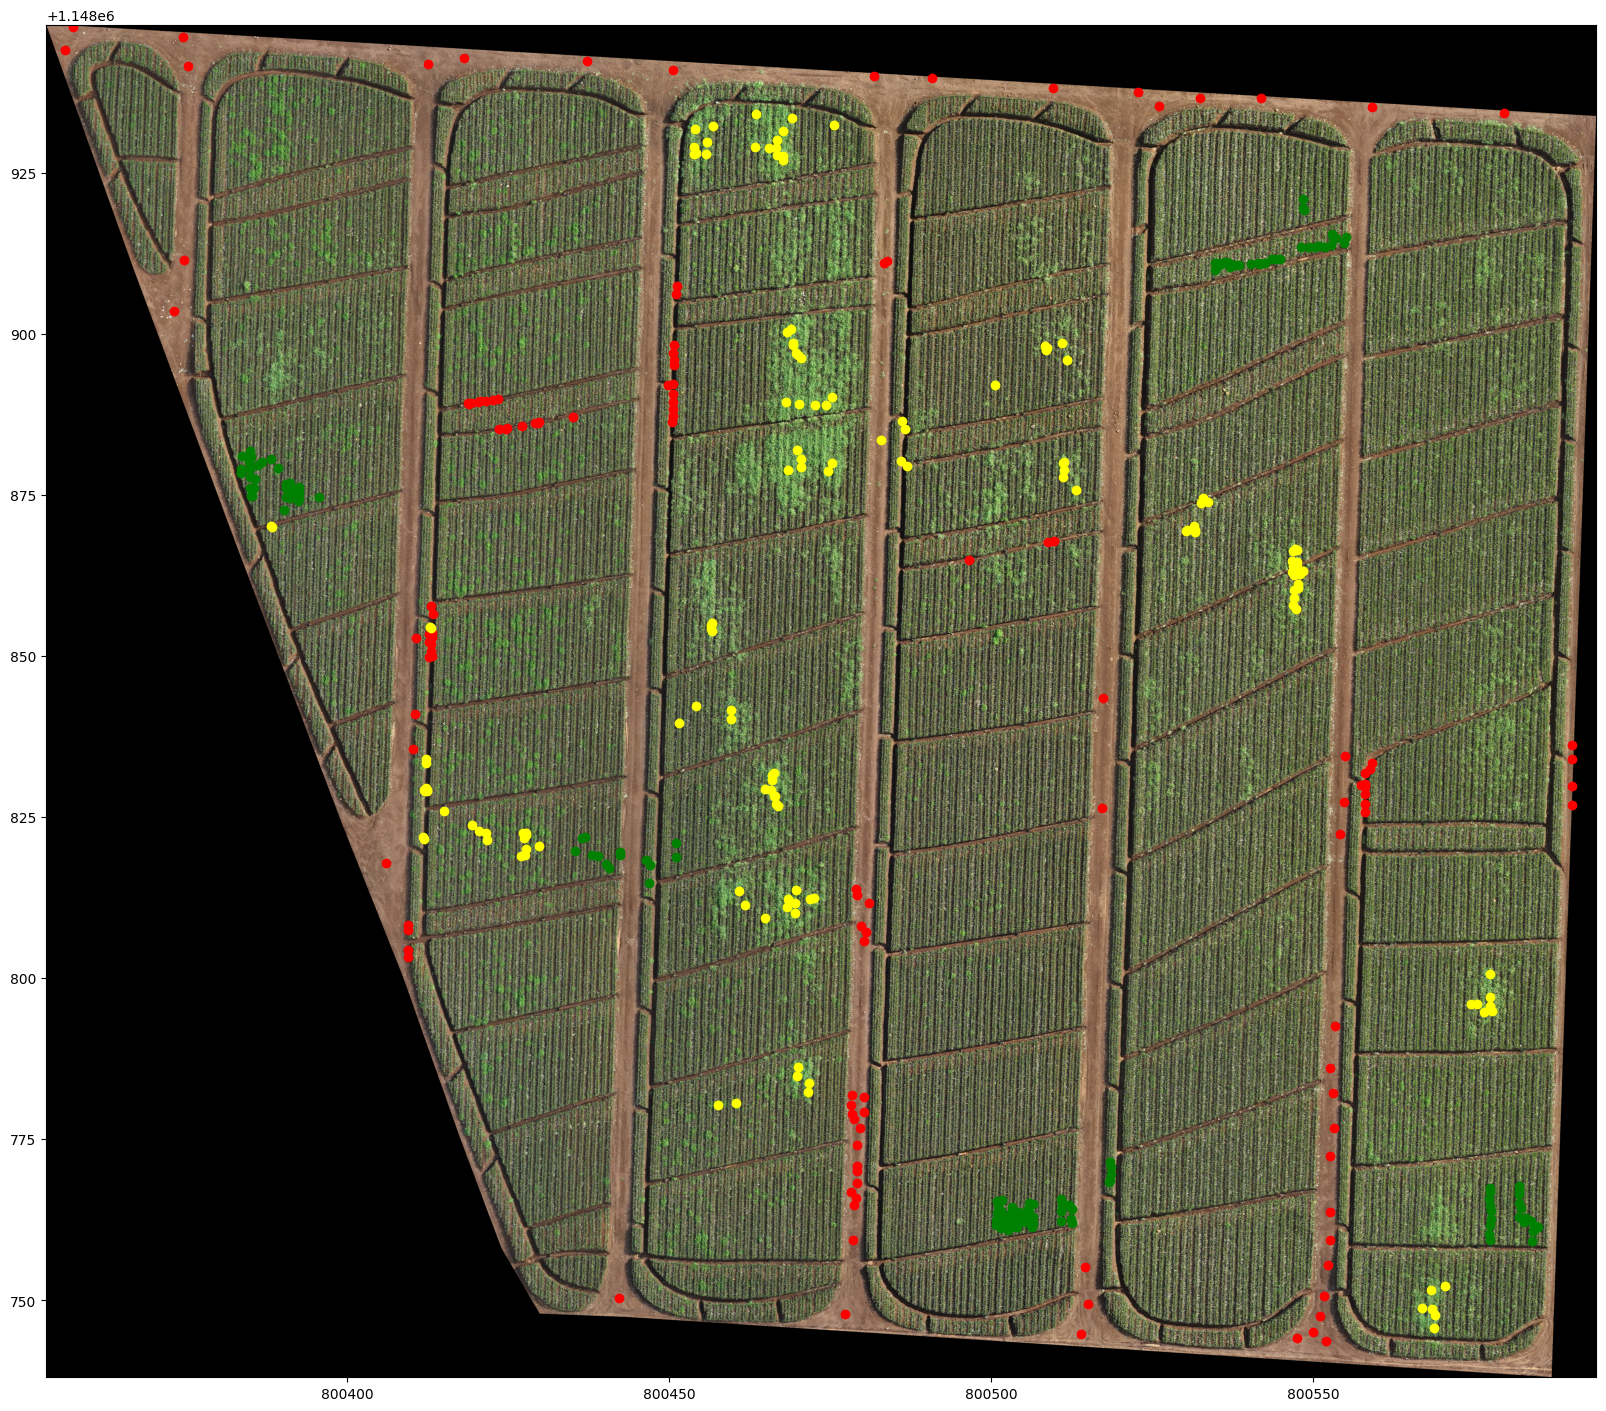

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
with rasterio.open(path_img) as src:
    gdf1 = gdf1.to_crs(src.crs.to_dict())
    gdf2 = gdf2.to_crs(src.crs.to_dict())
    gdf3 = gdf3.to_crs(src.crs.to_dict())
    show(src,ax=ax)
gdf1.plot(ax=ax, color='red')
gdf2.plot(ax=ax, color='green')
gdf3.plot(ax=ax, color='yellow')

Now we add an id to each of the classes:

In [ ]:
gdf1['id'] = 0
gdf2['id'] = 1
gdf3['id'] = 2

Let's concatenate the point geodataframes and extract the spectral values ​​from the image at each point:

In [ ]:
gdf = pd.concat([gdf1,gdf2,gdf3], axis=0)

In [ ]:
coord_list = [(x, y) for x, y in zip(gdf.geometry.x, gdf.geometry.y)]

In [ ]:
Values_list = []
Column_list = []
with rasterio.open(path_img) as src:
  Values = [x for x in src.sample(coord_list)]
  Values_list.append(Values)

In [ ]:
X = np.array(Values_list)
X = X[0].copy()
X = X[:,0:3].copy()

Now we have the X variable with the spectral data and the Y variable with the reference data:

In [ ]:
Y = gdf['id'].values
Y = Y[:,np.newaxis]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

Since we are working with categorical data, we need to encode categorical values ​​into binary values ​​so that they are compatible with the expected outputs of a neural network:

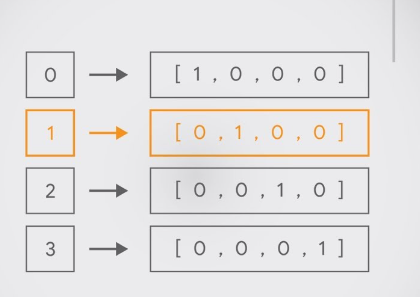

In [ ]:
enc = OneHotEncoder()

enc.fit(Y)

Y = enc.transform(Y).toarray()

In [ ]:
Y.shape

(431, 3)

So we split the data into training and testing:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
input_shape = (X_train.shape[1:])
num_classes = len(np.unique(gdf['id'].values))

In [ ]:
input_shape

(3,)

In [ ]:
num_classes

3

So let's build our neural network by adding the dense layers:

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1024      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 42723 (166.89 KB)
Trainable params: 42723 (166.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


And finally, train the model for 400 iterations:

In [ ]:
history = model.fit(X_train, Y_train, epochs=400, batch_size=250, verbose=1, validation_split=0.25)

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 6.1135 - accuracy: 0.3778 - val_loss: 2.8328 - val_accuracy: 0.3026
Epoch 2/400
1/1 [==============================] - 0s 35ms/step - loss: 3.3282 - accuracy: 0.2533 - val_loss: 3.4607 - val_accuracy: 0.3816
Epoch 3/400
1/1 [==============================] - 0s 36ms/step - loss: 3.9931 - accuracy: 0.3778 - val_loss: 2.1391 - val_accuracy: 0.4079
Epoch 4/400
1/1 [==============================] - 0s 36ms/step - loss: 2.3758 - accuracy: 0.4000 - val_loss: 1.0976 - val_accuracy: 0.3947
Epoch 5/400
1/1 [==============================] - 0s 34ms/step - loss: 1.0059 - accuracy: 0.4622 - val_loss: 1.8658 - val_accuracy: 0.4211
Epoch 6/400
1/1 [==============================] - 0s 33ms/step - loss: 1.7168 - accuracy: 0.4400 - val_loss: 1.6983 - val_accuracy: 0.5658
Epoch 7/400
1/1 [==============================] - 0s 34ms/step - loss: 1.5656 - accuracy: 0.5511 - val_loss: 1.0291 - val_accuracy: 0.6053
Epoch 8/400
1/1 [=====

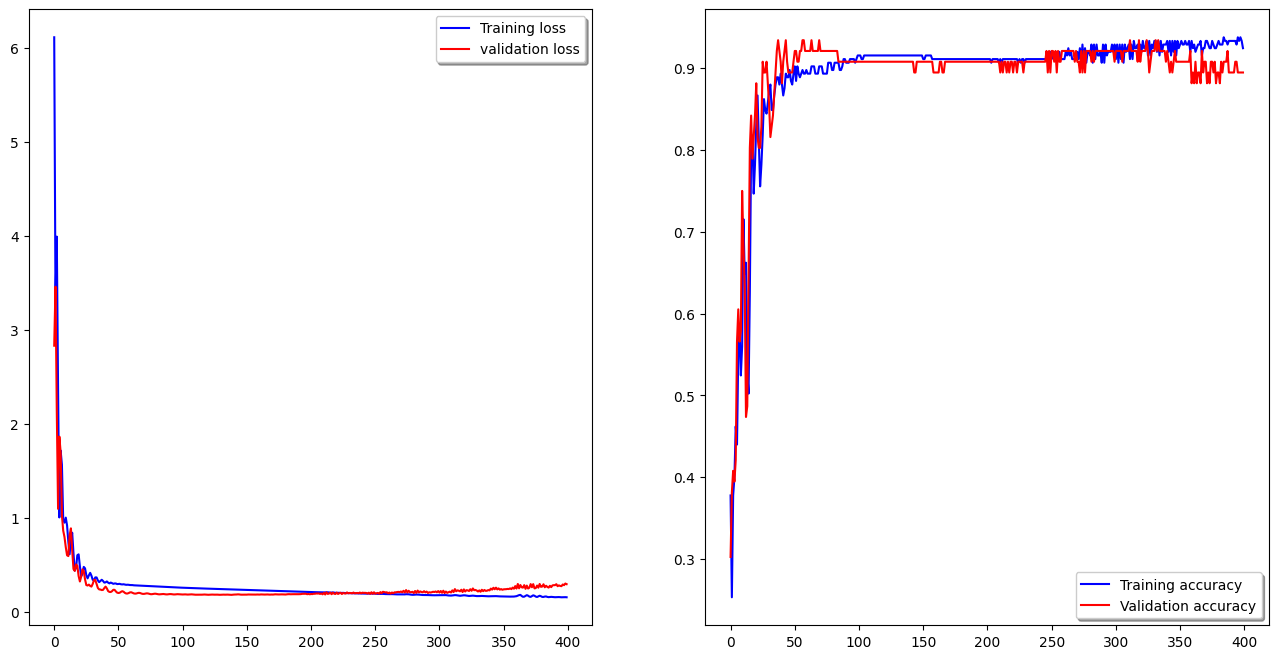

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Let's look at some model evaluation metrics:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20202559232711792
Test accuracy: 0.9230769276618958


In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred_res = np.argmax(y_pred, axis=1)

In [ ]:
Y_test_res = np.argmax(Y_test, axis=1)

In [ ]:
print(classification_report(Y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.85      0.89      0.87        38
           2       0.90      0.86      0.88        43

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



In [ ]:
c_matrix = confusion_matrix(Y_test_res, y_pred_res)

In [ ]:
names = ['Solo','Vegetação','Daninhas']

Text(0.5, 58.7222222222222, 'Predict')

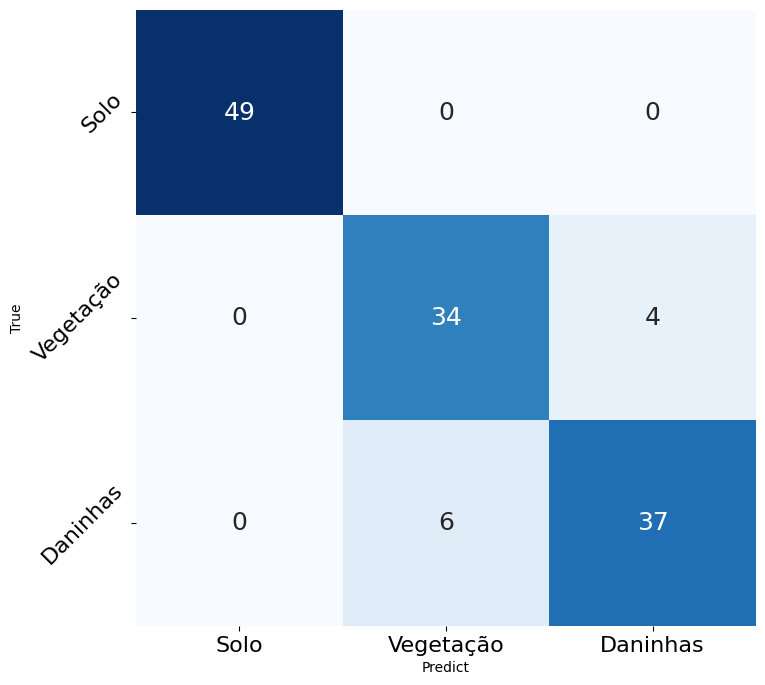

In [ ]:
r1 = pd.DataFrame(data=c_matrix, index= names, columns=names)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="Blues", cbar = False)
ax.tick_params(labelsize=16)
ax.set_yticklabels(names, rotation=45)
ax.set_ylabel('True')
ax.set_xlabel('Predict')

After training and validating our AI model, we will now apply it to the complete image, thus generating a map with the predictions:

In [ ]:
src = rasterio.open(path_img)
img = src.read()

In [ ]:
img = img.transpose([1,2,0])
img_size = (img.shape[0] , img.shape[1])
img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

In [ ]:
img.shape

(51650802, 4)

After opening the image, let's create a dataframe with the spectral information and the alpha band:

In [ ]:
df = pd.DataFrame(img, columns=['R','G','B','Mask'])

In [ ]:
del img, src

We will remove the non-valid values ​​using the alpha band:

In [ ]:
df_to_pred = df[df['Mask'] == 255].copy()
values_to_pred = df_to_pred.values[:,0:3]

In [ ]:
df_to_pred.drop(columns={'R', 'G', 'B'}, inplace = True)
df.drop(columns={'R', 'G', 'B'}, inplace = True)

Now we apply the model to the values ​​to obtain the predictions:

In [ ]:
pred = model.predict(values_to_pred)

1251127/1251127 [==============================] - 1999s 2ms/step


With the predicted values, we join them to the complete image dataframe by index:

In [ ]:
pred = np.argmax(pred, axis=1).copy()
df_to_pred['pred'] = pred

In [ ]:
del pred, values_to_pred, model

In [ ]:
df = pd.merge(df,df_to_pred, how='left', left_index=True, right_index=True)

In [ ]:
del df_to_pred

So we have the predictions and we can convert them to the original image size:

In [ ]:
values_to_export = df['pred'].values

In [ ]:
del df

In [ ]:
classify = values_to_export.reshape(img_size)
export_image = classify[np.newaxis,:,:]

Finally, we save the predicted image data with the georeferencing of the RGB image used:

In [ ]:
export_image.dtype

dtype('float64')

In [ ]:
src = rasterio.open(path_img)
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                  "height": export_image.shape[1],
                  "width": export_image.shape[2],
                  "compress":'lzw',
                  "nodata": np.nan,
                  "dtype": 'float64',
                  "count":1
                  })

In [ ]:
with rasterio.open('/content/mapa.tif', "w", **out_meta) as dest:
     dest.write(export_image)

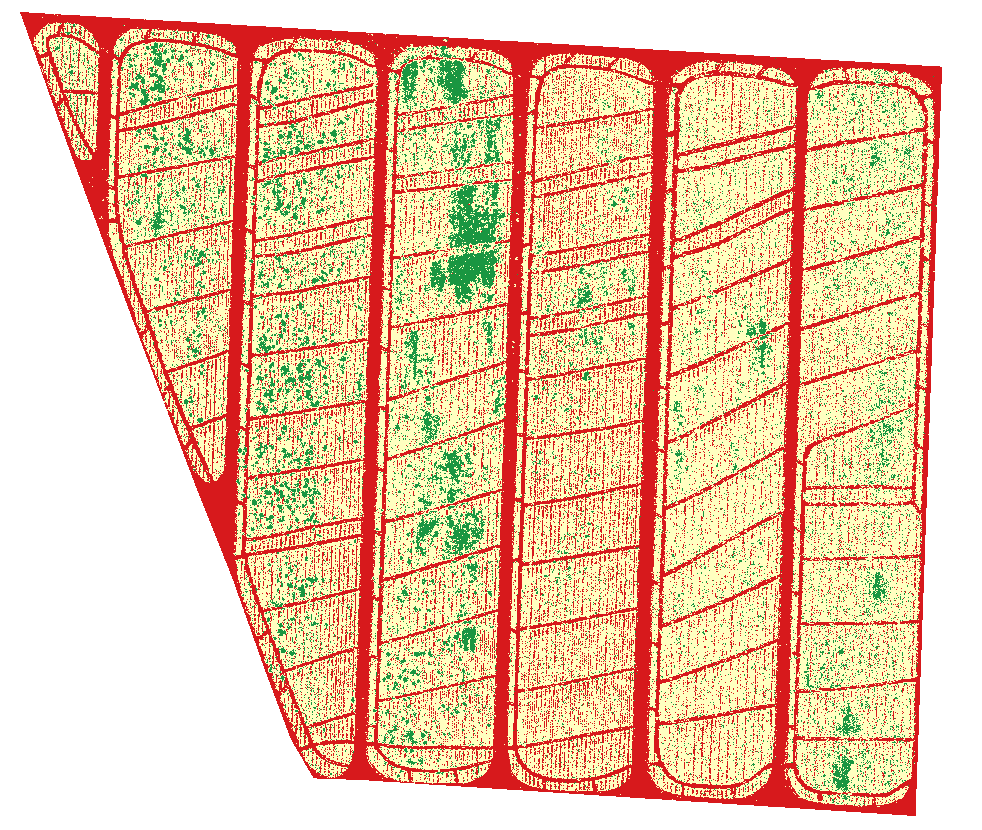

# If you are interested in learning more about Deep learning and computer vision applied to satellite and drone images, my new ebook is available for purchase!!

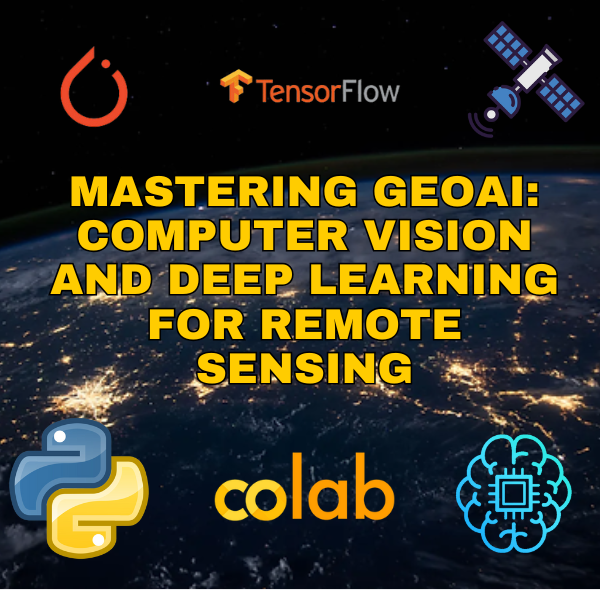

# Link: https://mentoriaai4rs.my.canva.site/mastering-geoai